In [1]:
!pwd

/home/ubuntu/Berend_Gort


In [14]:
%run imports.py

%cat imports.py

import seaborn as sns


import pandas as pd
import numpy as np

In [126]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [24]:
import sklearn
from sklearn import datasets
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection  import *
from sklearn.linear_model  import *

In [3]:
%store -r pokemon_df

In [4]:
2+3

5

#### LinearRegression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
linear_regression_estimator = LinearRegression()\
    .fit(pokemon_df[ ['HP','Attack','Defense'] ], 
         pokemon_df[ 'Total' ])

In [12]:
pokemon_df['Predicted_Total'] = linear_regression_estimator\
    .predict(pokemon_df[ ['HP','Attack','Defense'] ])

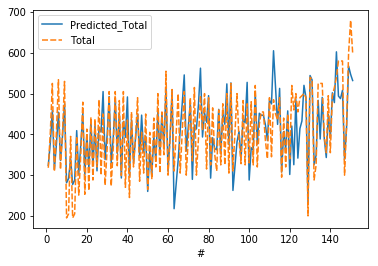

In [15]:
sns.lineplot(data = pokemon_df[ ['Predicted_Total', 'Total'] ])

/opt/Anaconda3-5.2.0-Linux-x86_64/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


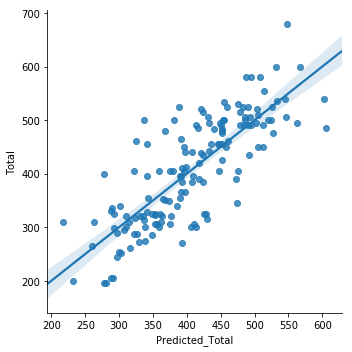

In [16]:
sns.lmplot(x='Predicted_Total',  y='Total',  data = pokemon_df)

#### Exercise 1.1: Use regression to predict pokemon atack speed from all other parameters. 

In [83]:
linear_regression_estimator = LinearRegression()\
    .fit(pokemon_df[ ['Total', 'HP', 'Attack', 'Defense', 'Sp_Def', 'Speed', 'Stage'] ], 
         pokemon_df[ 'Sp_Atk' ])

In [84]:
pokemon_df['Predicted_Sp_Atk'] = linear_regression_estimator\
    .predict(pokemon_df[ ['Total', 'HP', 'Attack', 'Defense', 'Sp_Def', 'Speed', 'Stage'] ])

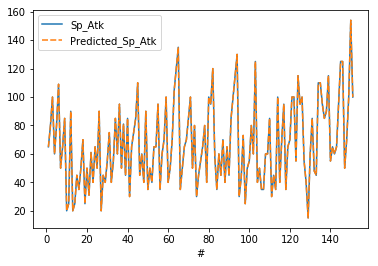

In [86]:
sns.lineplot(data = pokemon_df[ ['Sp_Atk', 'Predicted_Sp_Atk'] ])

/opt/Anaconda3-5.2.0-Linux-x86_64/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


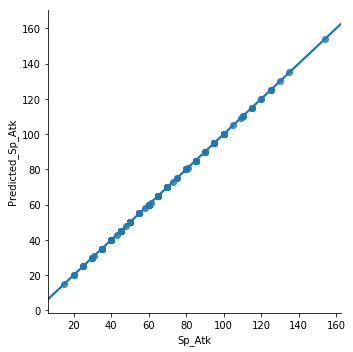

In [87]:
sns.lmplot(x='Sp_Atk',  y='Predicted_Sp_Atk',  data = pokemon_df)

In [88]:
sklearn.metrics.mean_squared_error(pokemon_df['Sp_Atk'], pokemon_df['Predicted_Sp_Atk'])

6.2508711220384326e-27

#### Exercise 1.2: Pay attention to Total variable and explain it's effect on approximation

In [66]:
linear_regression_estimator = LinearRegression()\
    .fit(pokemon_df[ ['HP', 'Attack', 'Defense', 'Sp_Def', 'Speed', 'Stage'] ], 
         pokemon_df[ 'Sp_Atk' ])

In [67]:
pokemon_df['Predicted_Sp_Atk'] = linear_regression_estimator\
    .predict(pokemon_df[ ['HP', 'Attack', 'Defense', 'Sp_Def', 'Speed', 'Stage'] ])

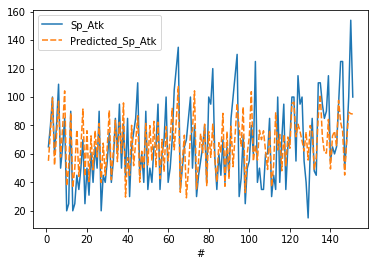

In [68]:
sns.lineplot(data = pokemon_df[ ['Sp_Atk', 'Predicted_Sp_Atk'] ])

/opt/Anaconda3-5.2.0-Linux-x86_64/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


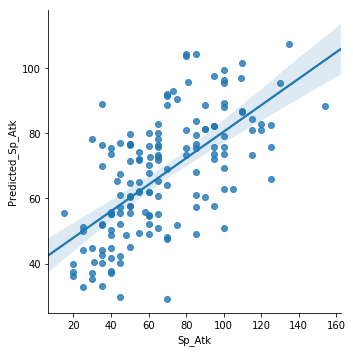

In [69]:
sns.lmplot(x='Sp_Atk',  y='Predicted_Sp_Atk',  data = pokemon_df)

Total variable is the most effective variable for estimating the other variables. Why is that so?

In [78]:
pokemon_df

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Stage,Legendary,Predicted_Total,HighStage,Predicted_HighStage,Predicted_Sp_Atk
#,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,324.106080,0,0,55.128073
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False,379.490966,1,1,75.515800
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False,458.770366,1,1,99.375597
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,314.442383,0,0,52.095862
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False,375.028057,1,1,73.214095
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,3,False,454.307457,1,1,97.073893
7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,336.068725,0,0,57.759609
8,Wartortle,Water,NaN,405,59,63,80,65,80,58,2,False,395.528275,1,1,78.284427
9,Blastoise,Water,NaN,530,79,83,100,85,105,78,3,False,474.807675,1,1,104.309143


In [79]:
metrics.mutual_info_score(pokemon_df['Total'],pokemon_df['Sp_Atk'])

2.345434026527266

In [131]:
total_other_features = pokemon_df['HP'] + pokemon_df['Attack'] + pokemon_df['Defense'] + pokemon_df['Sp_Atk'] + pokemon_df['Sp_Def'] + pokemon_df['Speed'] 
metrics.adjusted_mutual_info_score(pokemon_df['Total'],total_other_features)

1.0

This means that the total value is fully correlated to the sum of the other pokemon attributes, and therefore it is very important to use it to compute any of the other attributes.

#### KNeighborsClassifier

In [152]:
from sklearn.neighbors import KNeighborsClassifier

In [154]:
pokemon_df

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Stage,Legendary,Predicted_Total,HighStage,Predicted_HighStage,Predicted_Sp_Atk
#,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,324.106080,0,0,65.0
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False,379.490966,1,1,80.0
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False,458.770366,1,1,100.0
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,314.442383,0,0,60.0
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False,375.028057,1,1,80.0
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,3,False,454.307457,1,1,109.0
7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,336.068725,0,0,50.0
8,Wartortle,Water,NaN,405,59,63,80,65,80,58,2,False,395.528275,1,1,65.0
9,Blastoise,Water,NaN,530,79,83,100,85,105,78,3,False,474.807675,1,1,85.0


In [153]:
pokemon_df['HighStage'] = (pokemon_df['Stage']>=2) *1
%store pokemon_df

Stored 'pokemon_df' (DataFrame)


In [155]:
nearest_negihbours_estimator = KNeighborsClassifier()\
    .fit(pokemon_df[ ['HP','Attack','Defense'] ], 
         pokemon_df[ 'HighStage' ])

In [73]:
pokemon_df['Predicted_HighStage'] = nearest_negihbours_estimator\
    .predict(pokemon_df[ ['HP','Attack','Defense'] ])

#### Confusion matrix score

In [74]:
metrics.confusion_matrix( 
    pokemon_df[  'HighStage'],
    pokemon_df['Predicted_HighStage'])

array([[61, 18],
       [ 9, 63]])

In [75]:
confusion_matrix_df = pokemon_df\
    .groupby([ 'HighStage','Predicted_HighStage'])\
    .apply(len).reset_index()
confusion_matrix_df

,HighStage,Predicted_HighStage,0
0,0,0,61
1,0,1,18
2,1,0,9
3,1,1,63


In [42]:
confusion_matrix_df.columns = ['HighStage',
                               'Predicted_HighStage',
                               'count']

confusion_matrix_df['Parameter name'] = ['True Negative', 'False Positive' , 'False Negative','True Positive']


confusion_matrix_df

,HighStage,Predicted_HighStage,count,Parameter name
0,0,0,61,True Negative
1,0,1,18,False Positive
2,1,0,9,False Negative
3,1,1,63,True Positive


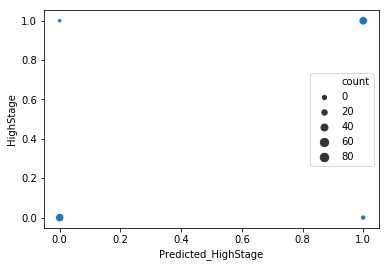

In [43]:
sns.scatterplot(x= 'Predicted_HighStage',
                y = 'HighStage',
                data = confusion_matrix_df,
                size = 'count'
               )

In [45]:
confusion_matrix_df = confusion_matrix_df.set_index('Parameter name')
confusion_matrix_df

,HighStage,Predicted_HighStage,count
Parameter name,,,
True Negative,0,0,61
False Positive,0,1,18
False Negative,1,0,9
True Positive,1,1,63


In [47]:
accuracy = (confusion_matrix_df['count']['True Positive'] + confusion_matrix_df['count']['True Negative'])/(confusion_matrix_df['count'].sum())
accuracy

0.8211920529801324

In [59]:
precision = confusion_matrix_df['count']['True Positive']\
             /(confusion_matrix_df['count'][confusion_matrix_df['Predicted_HighStage']==1].sum())

precision

0.7777777777777778

#### Exercise 1.3: Construct classifier for survivability in titanic dataset

In [161]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [162]:
from sklearn.neighbors import KNeighborsClassifier

In [163]:
nearest_neighbours_estimator = KNeighborsClassifier()\
    .fit(titanic_df[ ['Pclass', 'SibSp', 'Parch', 'Fare'] ], 
         titanic_df[ 'Survived' ])

In [164]:
titanic_df['Predicted_HighStage'] = nearest_neighbours_estimator\
    .predict(titanic_df[ ['Pclass', 'SibSp', 'Parch', 'Fare']] )

#### Exercise 1.4: Construct classifier for iris type 2 in iris dataset

In [166]:
iris = datasets.load_iris()

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [167]:
iris = datasets.load_iris()

iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [180]:
train_iris_type2 = iris.target == 2

In [181]:
nearest_neighbours_estimator = KNeighborsClassifier()\
    .fit(iris.data , 
         train_iris_type2)

In [182]:
iris_predict = nearest_neighbours_estimator\
    .predict(iris.data)

iris_predict

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,